# Scraping top repositories of top topics of Github

### Outline:

- We're going to scrape https://github.com/topics
- We'll get a list of topics. For each topic, we'll get topic title, topic page url and topic page decription
- For each topic, we'll get the top 25 repositiories of the topic from the topic page
- For each repo, we'll get repo name, username, stars and repo link

## Scraping the top topics from the github topic page and save it in a csv file

#### Importing libraries - requests, BeautifulSoup and pandas

In [1]:
# importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### Requesting the topic page of github and parsing it

In [2]:
# Parsing topic page of github
topic_page_url = "https://github.com/topics"
response = requests.get(topic_page_url)
page_content = response.text
doc1 = BeautifulSoup(page_content, "html5lib")

#### Parsing the topic page to get the line of html code that contain the paragraph and anchor tags that contain the information related to the topics 

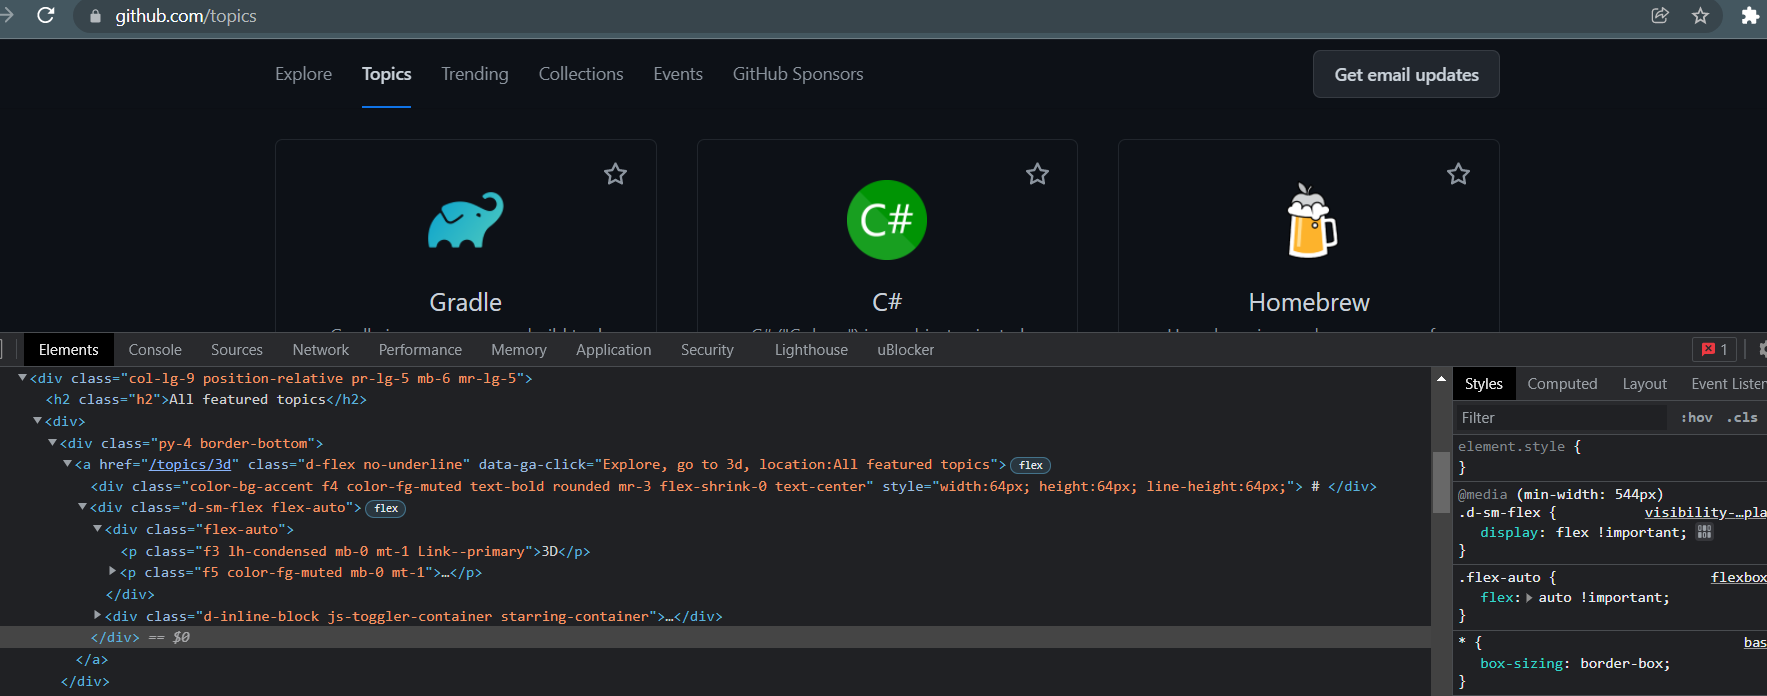

In [3]:
# Parsing the page to get the paras and anchors 
topic_name = doc1.find_all("p", {"class" : "f3 lh-condensed mb-0 mt-1 Link--primary"})
topic_link = doc1.find_all("a", {"class" : "d-flex no-underline"})
topic_descriptions = doc1.find_all("p", {"class" : "f5 color-fg-muted mb-0 mt-1"})

#### Storing the topic name, description and their links in a list

In [4]:
# Get the topic name, url and description and store it in a list
topics = []
topic_links = []
topic_descr = []
for i in range(30):
    topics.append(topic_name[i].text)
i = 0
while i<90:
    base_url = "https://github.com"
    topic_links.append(base_url + topic_link[i]["href"])
    i+=3
for i in range(30):
    topic_descr.append(topic_descriptions[i].text.strip())

#### Creating a csv file for the list of topics

In [5]:
# Create a csv file for topics
topic_dict = {"Topic" : topics,
             "Description" : topic_descr,
             "Topic Link" : topic_links}
topics_df = pd.DataFrame(topic_dict)
topics_df.to_csv("Topics github revised.csv")

In [6]:
topics_df.head()

,Topic,Description,Topic Link
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency framework fo...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


## Scraping the top repos for each topic and store each in a different csv file

### Outline:
- Send request to a particular topic page
- 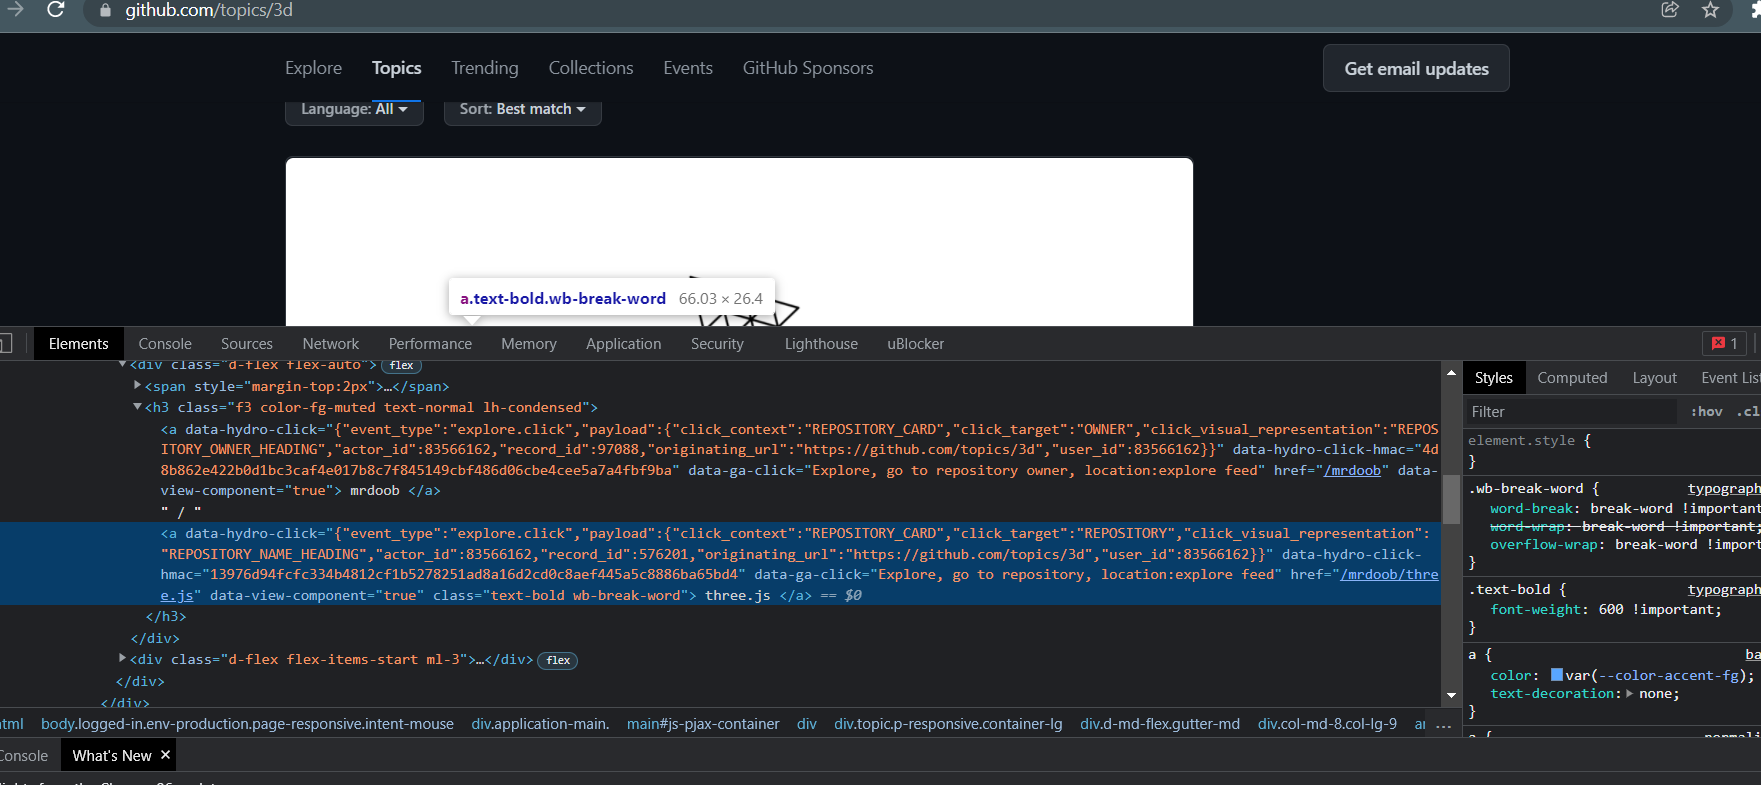
- Create a function to get the username, repo_name, stars and link of a particular repository of a particular topic page
- Create a dictionary to hold the repository information of a particular topic
- Iterate through the topic page and store each repository information in a dictionary
- Convert the dictionary into dataframe and then store it in a csv file

In [7]:
# Code to get a csv file for a particular topic

# Sending request to a particular topic page and then parsing it
github_link = "https://github.com/"
response = requests.get(topic_links[0])
page_content_1 = response.text
doc2 = BeautifulSoup(page_content_1, "html5lib")
topic_repo = doc2.find_all("h3", {"class" : "f3 color-fg-muted text-normal lh-condensed"})
topic_stars = doc2.find_all("a", {"class" : "social-count float-none"})

# A function to get the username, repo_name, stars and link of a particular repository in a particular topic page
def get_info_topic(h3_tag, star_tag, i) :
    a_tags = h3_tag[i].find_all("a")
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    stars = star_tag[i].text.strip()
    link = github_link + a_tags[1]["href"]
    return username, repo_name, stars, link

# Creating a dictionary to hold the repo information of a particular topic
topic_repo_dict = {"Username" : [],
                  "Repo_name" : [],
                  "Stars" : [],
                  "Repo_url" : []}

# Iterating through a particular page to get the repo info and appending it in a dictionary
for i in range(30):
    info = get_info_topic(topic_repo, topic_stars, i)
    topic_repo_dict["Username"].append(info[0])
    topic_repo_dict["Repo_name"].append(info[1])
    topic_repo_dict["Stars"].append(info[2])
    topic_repo_dict["Repo_url"].append(info[3])

# Converting dictionary into dataframe and then converting it into a csv file
topic_repo_df = pd.DataFrame(topic_repo_dict)
topic_repo_df.to_csv("3D.csv")

#### Create a function to get the username, repo_name, stars and link of a particular repository of a particular topic page

In [11]:
# A function which returns the username, repo_name, stars, link of a single rpository of a particular topic page
def get_info_topic(h3_tag, star_tag, i) :
    a_tags = h3_tag[i].find_all("a")
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    stars = star_tag[i].text.strip()
    link = github_link + a_tags[1]["href"]
    return username, repo_name, stars, link

### Iterate through the topic page and then iterate through each topic and store their repositories in a csv file

In [12]:
# Creating first 15 csv files 

# 1st "for loop" for iterating through the topic page
for i in range(15):
    filename = "./data/"+ topic_links[i].split("/")[-1] + ".csv"
    response = requests.get(topic_links[i])
    page_content_1 = response.text
    doc2 = BeautifulSoup(page_content_1, "html5lib")
    topic_repo = doc2.find_all("h3", {"class" : "f3 color-fg-muted text-normal lh-condensed"})
    topic_stars = doc2.find_all("a", {"class" : "social-count float-none"})
    
    topic_repo_dict = {"Username" : [],"Repo_name" : [],"Stars" : [],"Repo_url" : []}
    
    # 2nd "for loop" for iterating through a particular topic page
    for i in range(30):
        info = get_info_topic(topic_repo,topic_stars,i)
        topic_repo_dict["Username"].append(info[0])
        topic_repo_dict["Repo_name"].append(info[1])
        topic_repo_dict["Stars"].append(info[2])
        topic_repo_dict["Repo_url"].append(info[3])
    
    topic_repo_df = pd.DataFrame(topic_repo_dict)
    topic_repo_df.to_csv(filename)

In [13]:
# Creating last 15 csv files
for i in range(15,30):
    filename = "./data/"+ topic_links[i].split("/")[-1] + ".csv"
    response = requests.get(topic_links[i])
    page_content_1 = response.text
    doc2 = BeautifulSoup(page_content_1, "html5lib")
    topic_repo = doc2.find_all("h3", {"class" : "f3 color-fg-muted text-normal lh-condensed"})
    topic_stars = doc2.find_all("a", {"class" : "social-count float-none"})
    
    topic_repo_dict = {"Username" : [],"Repo_name" : [],"Stars" : [],"Repo_url" : []}
    
    for i in range(30):
        info = get_info_topic(topic_repo,topic_stars,i)
        topic_repo_dict["Username"].append(info[0])
        topic_repo_dict["Repo_name"].append(info[1])
        topic_repo_dict["Stars"].append(info[2])
        topic_repo_dict["Repo_url"].append(info[3])
    
    topic_repo_df = pd.DataFrame(topic_repo_dict)
    topic_repo_df.to_csv(filename)